# Student Performance Indicator

**Life cycle of Machine Learning Project**

* Understand the problem statement
* Data Collection
* Data checks to perform 
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose best model

**1. Problem Statement**

* This project is to understand how students performance(test score) affected by other variables such as Gender,Ethnicity,Parental level of education, Lunch and test preparation course.

**2. Data Collection**

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetld=74977

**2.1 Import data and Requird Packages**

* import libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

* Import data 

In [4]:
df = pd.read_csv('data/stud.csv')

* Top 5 rows of dataset

In [5]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


* Shape of the data

In [6]:
df.shape

(1000, 8)

*Dataset has 8 columns and 1000 rows.*

**3. Data checks to perform**

* Check missing Values
* Check duplicates
* Check Data type
* Check the number of unique values of each column
* Check statistics of dataset
* Check various categories present in the different categorical column

**3.1 Check missing values**

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

*There is no missing value in dataset*

**3.2 Check Duplicates**

In [8]:
df.duplicated().sum()

0

*There is no deplicate values in dataset*

**3.3 Check Data type**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


*5 columns with object data type and 3 columns with integer datatype*

**3.4 Check number of unique values in each column**

In [10]:
print('Number of unique values in each column:\n',df.nunique())

Number of unique values in each column:
 gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64


**3.5 Check Statistics of dataset**

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**3.6 Check various categories present in the different categorical column**

In [12]:
print('Categories in gender variable:                       ', df.gender.unique())
print('Categories in race_ethnicity variable:               ', df.race_ethnicity.unique())
print('Categories in parental_level_of_education variable:  ', df.parental_level_of_education.unique())
print('Categories in lunch variable:                        ', df.lunch.unique())
print('Categories in test_preparation_course variable:      ', df.test_preparation_course.unique())


Categories in gender variable:                        ['female' 'male']
Categories in race_ethnicity variable:                ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:                         ['standard' 'free/reduced']
Categories in test_preparation_course variable:       ['none' 'completed']


In [13]:
#define numerical and categorical columns

numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('we have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical_features: {}'.format(len(categorical_feature),categorical_feature))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical_features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


**3.8 Feature Engineering: Adding 'Total score' and 'Average score'**

In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
df['total_score'] = df.math_score	+ df.reading_score + df.writing_score 
df['average_score'] = df.total_score/3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [16]:
print('Number of Students with full marks in math:     ',df[df['math_score']==100]['gender'].count())
print('Number of students with full marks in reading: ' ,df[df['reading_score']==100]['gender'].count())
print('Number of students wwith full marks in writing:',df[df['writing_score']==100]['gender'].count())

Number of Students with full marks in math:      7
Number of students with full marks in reading:  17
Number of students wwith full marks in writing: 14


In [17]:
print('Number of Students with less than or equal marks in math:     ',df[df['math_score']<=20]['gender'].count())
print('Number of students with less than or equalmarks in reading:  ' ,df[df['reading_score']<=20]['gender'].count())
print('Number of students wwith less than or equal marks in writing: ',df[df['writing_score']<=20]['gender'].count())

Number of Students with less than or equal marks in math:      4
Number of students with less than or equalmarks in reading:   1
Number of students wwith less than or equal marks in writing:  3


**4. Exploratory Data Analysis**

**4.1 Visualize average score distribution to make some conclusion.**

* Histogram
* Kernel Distribution Function

**4.1.1 Histogram**

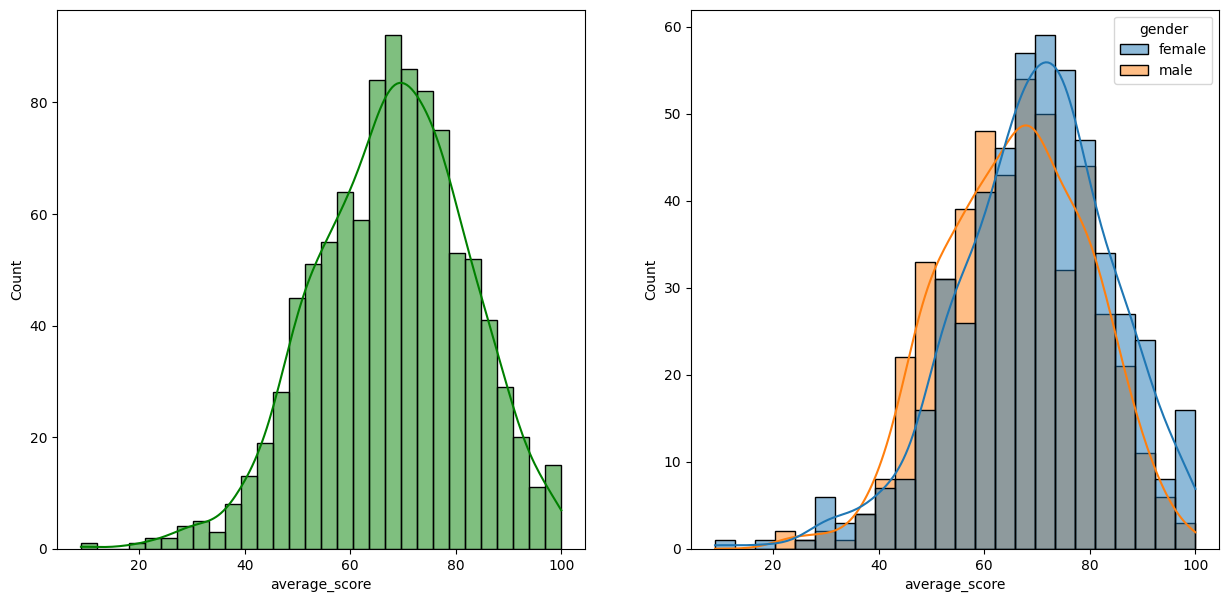

In [18]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')

plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')

plt.show()

**4.1.2 WRT total_score**

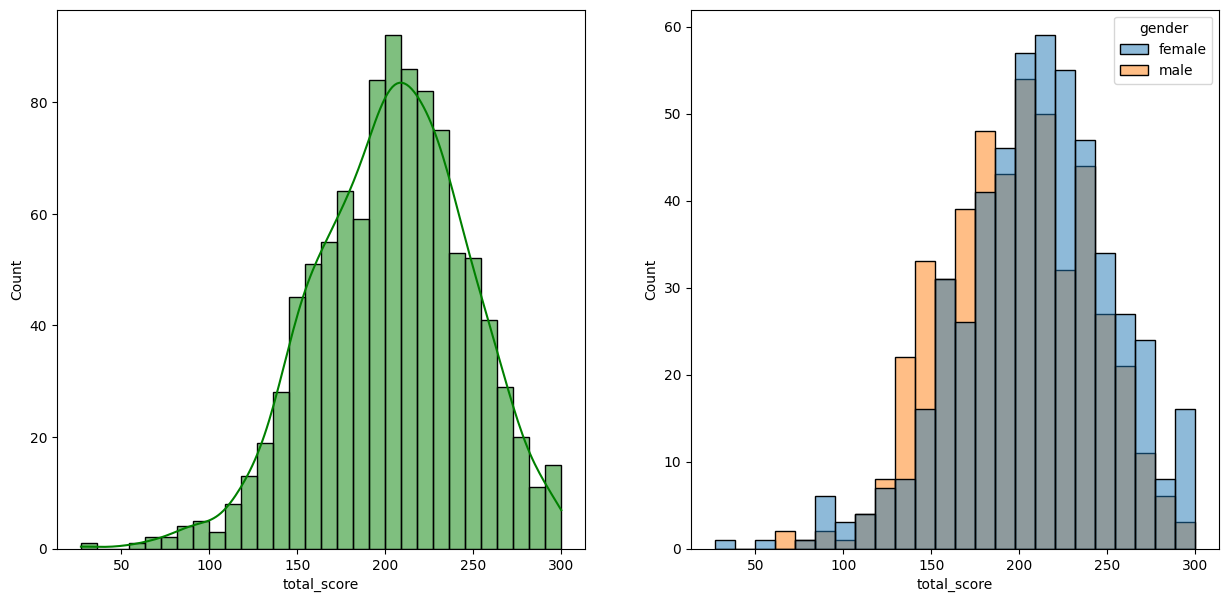

In [19]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')

plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',hue='gender')

plt.show()

**4.1.3 With respect to luch**

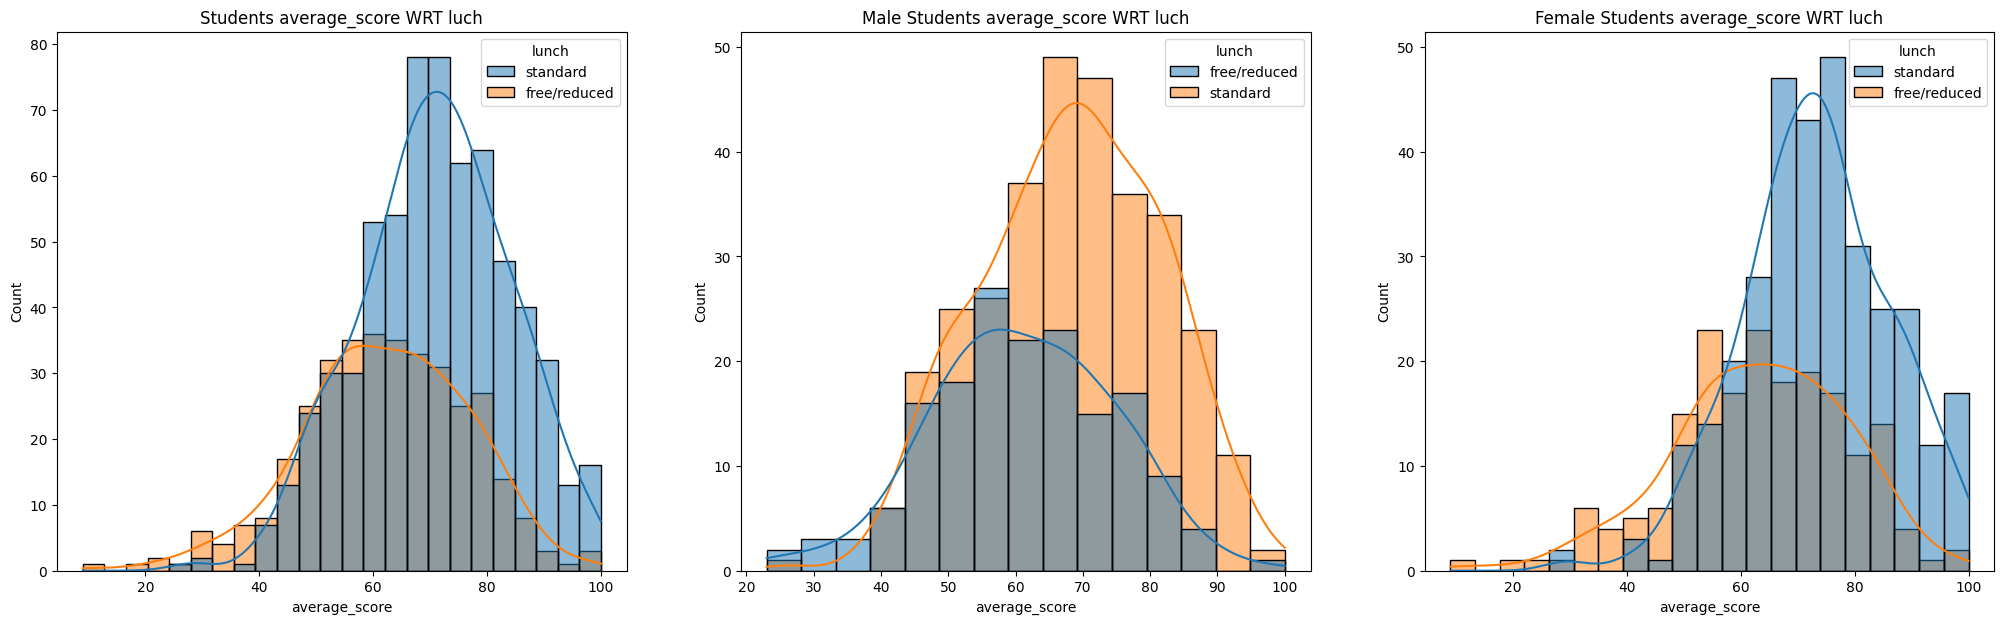

In [20]:
fig = plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
plt.title('Students average_score WRT luch')
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')

plt.subplot(1,3,2)
plt.title('Male Students average_score WRT luch')
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')

plt.subplot(1,3,3)
plt.title('Female Students average_score WRT luch')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')

plt.show()

**Insights**

* Standard lunch helps to perform well in exams either male student or female.

**4.1.4 WRT parental_level_of_education**

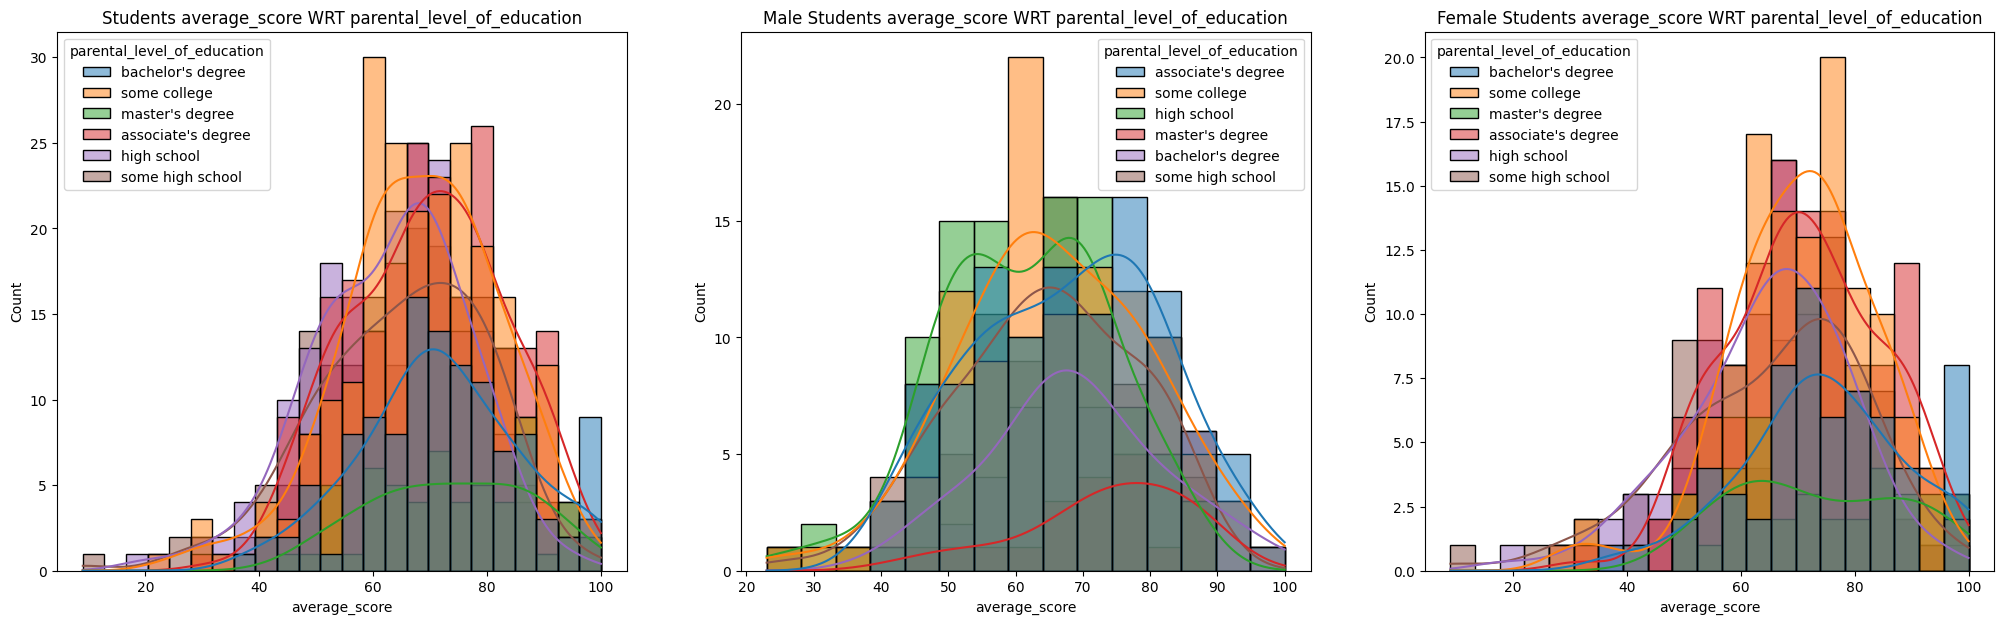

In [21]:
fig = plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
plt.title('Students average_score WRT parental_level_of_education')
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')

plt.subplot(1,3,2)
plt.title('Male Students average_score WRT parental_level_of_education')
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')

plt.subplot(1,3,3)
plt.title('Female Students average_score WRT parental_level_of_education')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')

plt.show()

**Insight**

* parental_level_of_education does not effect well on students performance in exams

**4.1.5 WRT race_ethnicity**

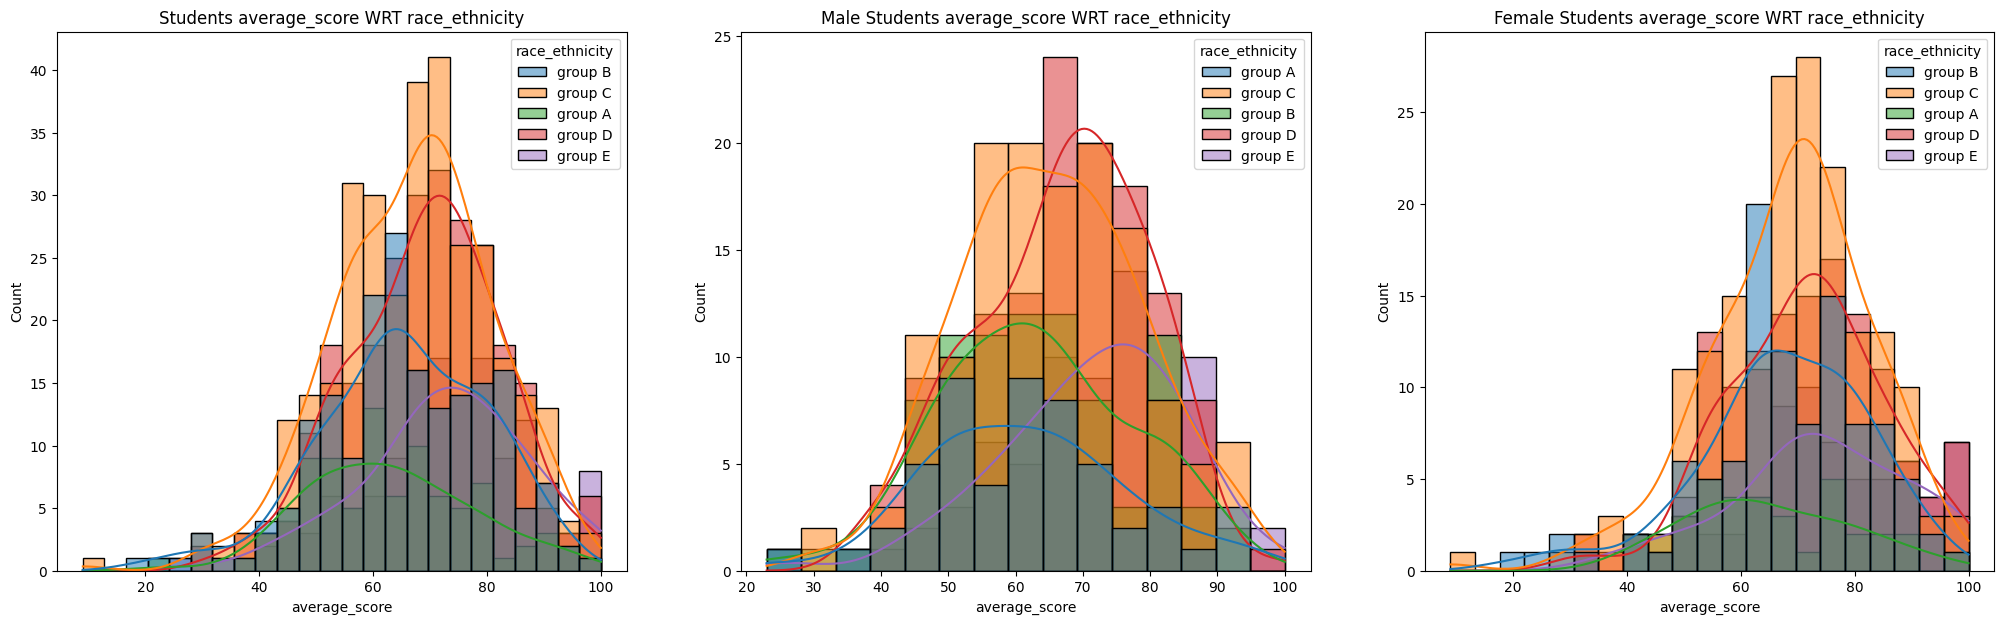

In [22]:
fig = plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
plt.title('Students average_score WRT race_ethnicity')
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')

plt.subplot(1,3,2)
plt.title('Male Students average_score WRT race_ethnicity')
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')

plt.subplot(1,3,3)
plt.title('Female Students average_score WRT race_ethnicity')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')

plt.show()

**Insight**

* Students belong to group A and group B tend to perform poorly in exams

**4.2.1 Maximum score of students in three subjects**

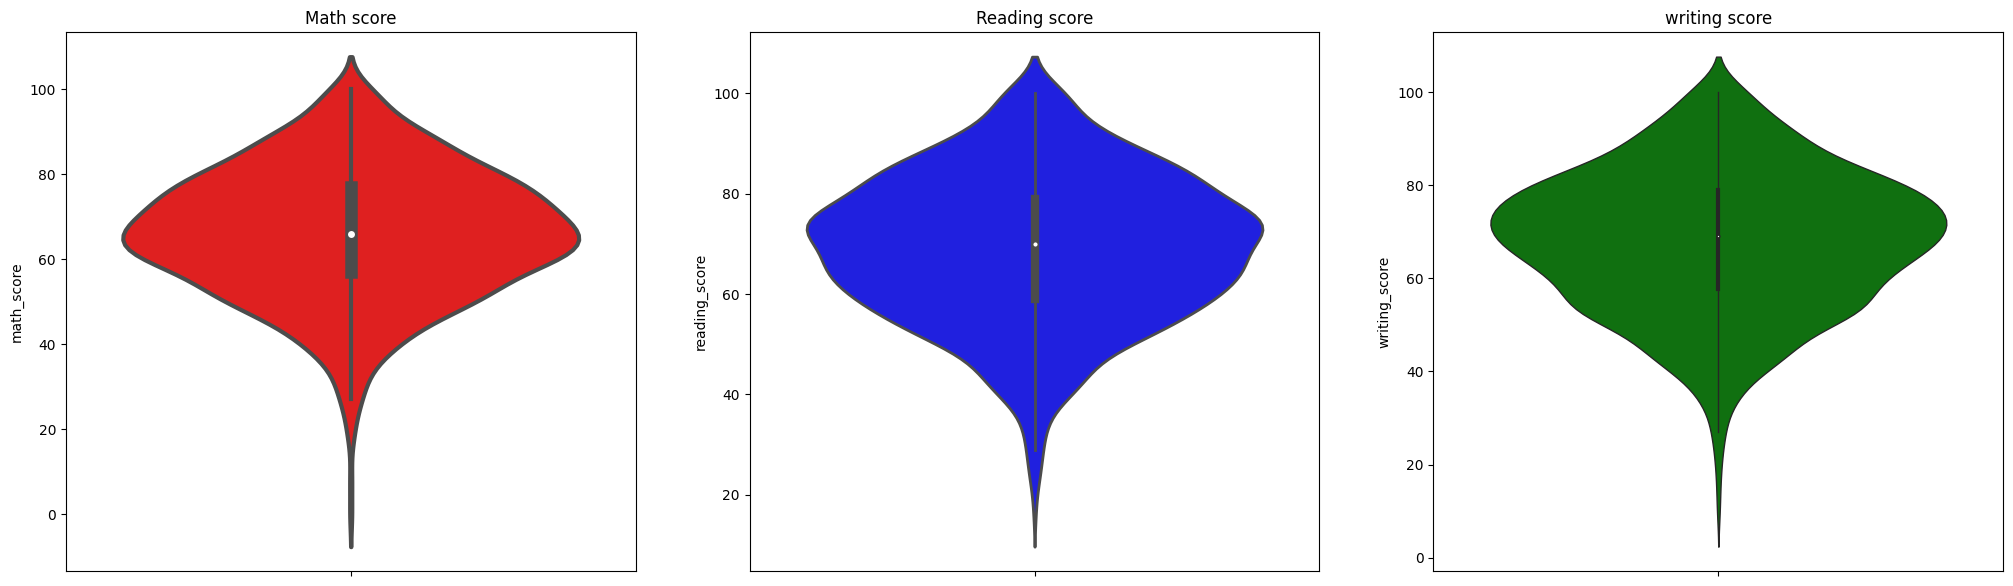

In [23]:
fig = plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
plt.title('Math score')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)

plt.subplot(1,3,2)
plt.title('Reading score')
sns.violinplot(data=df,y='reading_score',color='blue',linewidth=2)

plt.subplot(1,3,3)
plt.title('writing score')
sns.violinplot(data=df,y='writing_score',color='green',linewidth=1)

plt.show()

**Insight**

* Most of the students score between 60-80.

**4.3 Multivariate Analysis using pieplot**

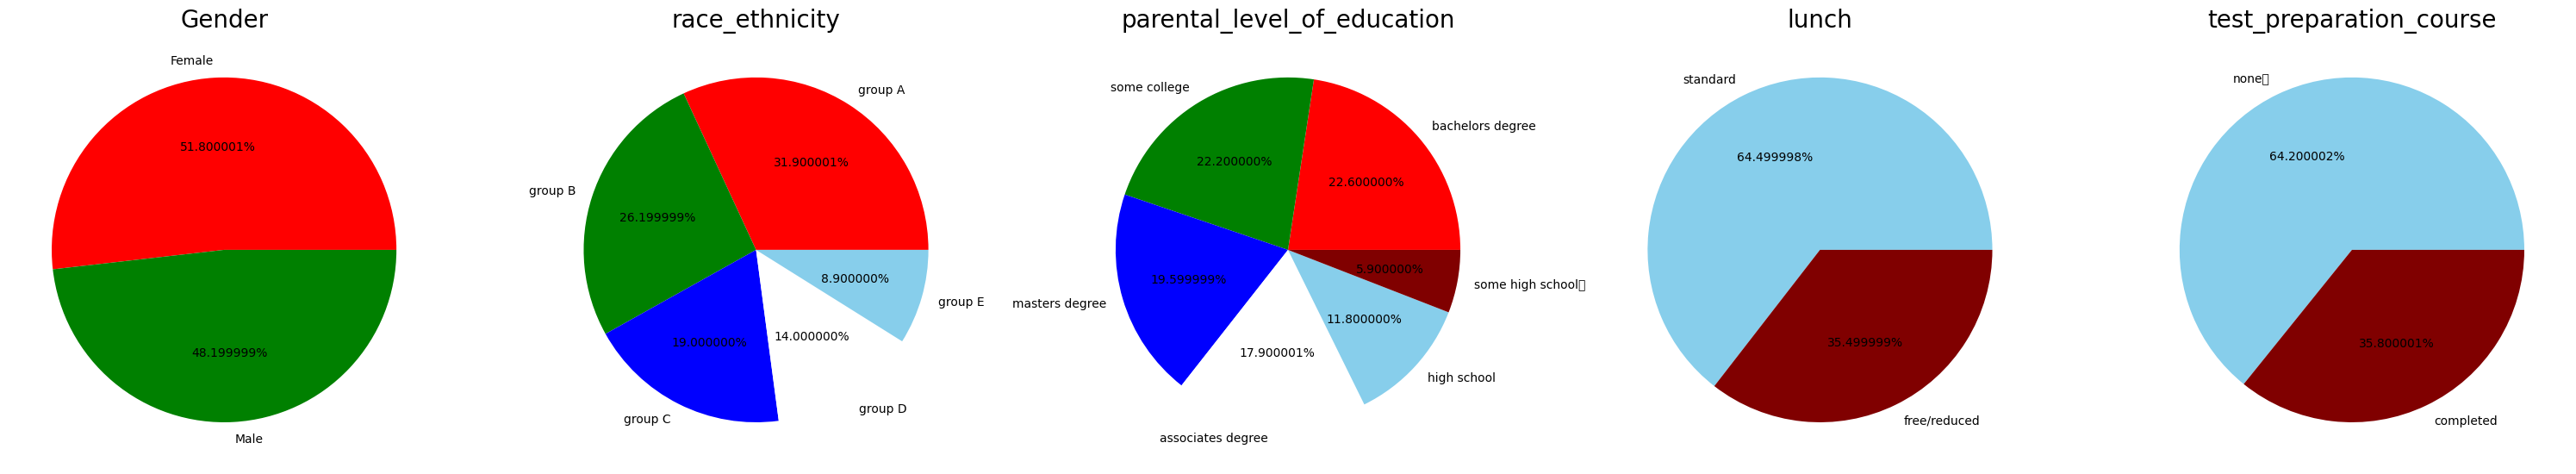

In [24]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df.gender.value_counts()
labels = 'Female','Male'
colors = ['red','green']
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')

plt.subplot(1,5,2)
size = df.race_ethnicity.value_counts()
labels = 'group A','group B','group C','group D','group E'
colors = ['red','green','blue','white','skyBLUE']
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')

plt.subplot(1,5,3)
size = df.parental_level_of_education.value_counts()
labels = 'bachelors degree','some college','masters degree','associates degree','high school','some high school	'
colors = ['red','green','blue','white','skyBLUE','maroon']
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')

plt.subplot(1,5,4)
size = df.lunch.value_counts()
labels = 'standard','free/reduced'
colors = ['skyBLUE','maroon']
plt.title('lunch',fontsize=20)
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')

plt.subplot(1,5,5)
size = df.test_preparation_course.value_counts()
labels = 'none	','completed'
colors = ['skyBLUE','maroon']
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')
plt.pie(size,labels=labels,colors=colors,autopct='%2f%%')

plt.tight_layout()
plt.grid()

plt.show()


**Insights**

* Number of male and female students are almost equal.
* Students with group A are greater in number.
* Number of students having standard lunch are greater.
* Number of students who have not enrolled in test preparation are greater.

**4.4 Feature vise Visualization**

* How is distribution of gender?
* Gender has any impact on students performance?

**4.4.1 Univariate Analysis (How is distribution of Gender?)**

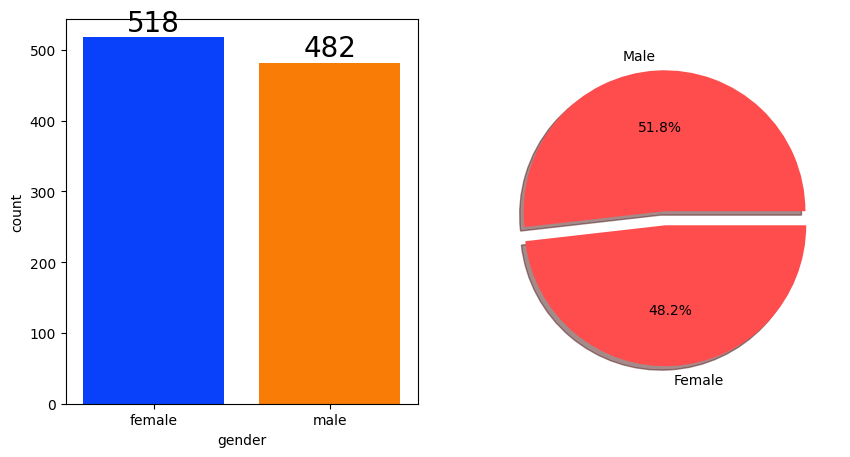

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x=df.gender,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df.gender.value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=["#ff4d4d"])
plt.show()


**Insights**

* Gender has balanced data with 518(48%) females and 482(52%) male.

**Is gender has any impact on students performance?**

In [31]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


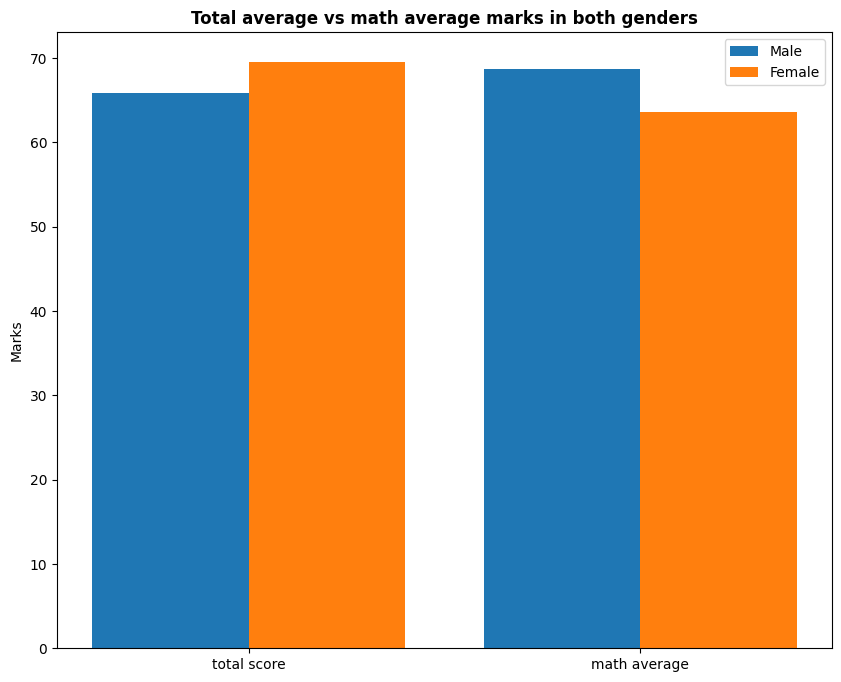

In [32]:
plt.figure(figsize=(10,8))

x = ['total score','math average']

female_score = [gender_group['average_score'][0],gender_group['math_score'][0]]
male_score = [gender_group['average_score'][1],gender_group['math_score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_score, 0.4 , label='Male')
plt.bar(x_axis + 0.2 , female_score, 0.4 , label = 'Female')

plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title('Total average vs math average marks in both genders',fontweight='bold')
plt.legend()
plt.show()

**Insights**

* On average female has better over all score than men.
* male as scored higher in math.

**4.4.2 RACE_ETHNICITY COLUMN**

* How is group wise distribution??
* Is race_ethnicity has any impact on students performance?

**Univariate analysis (how is group wise distribution?)**

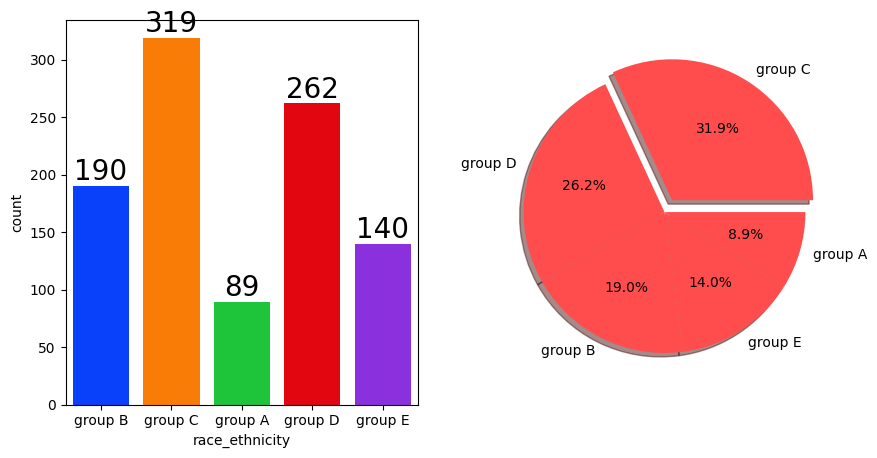

In [33]:
f,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x=df.race_ethnicity,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df.race_ethnicity.value_counts(),labels=df.race_ethnicity.value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=["#ff4d4d"])
plt.show()

**Insights**

* Most of the students belonging to group C and D 

**Bivariate analysis(Race_ethnicity has any impact on students performance?)**

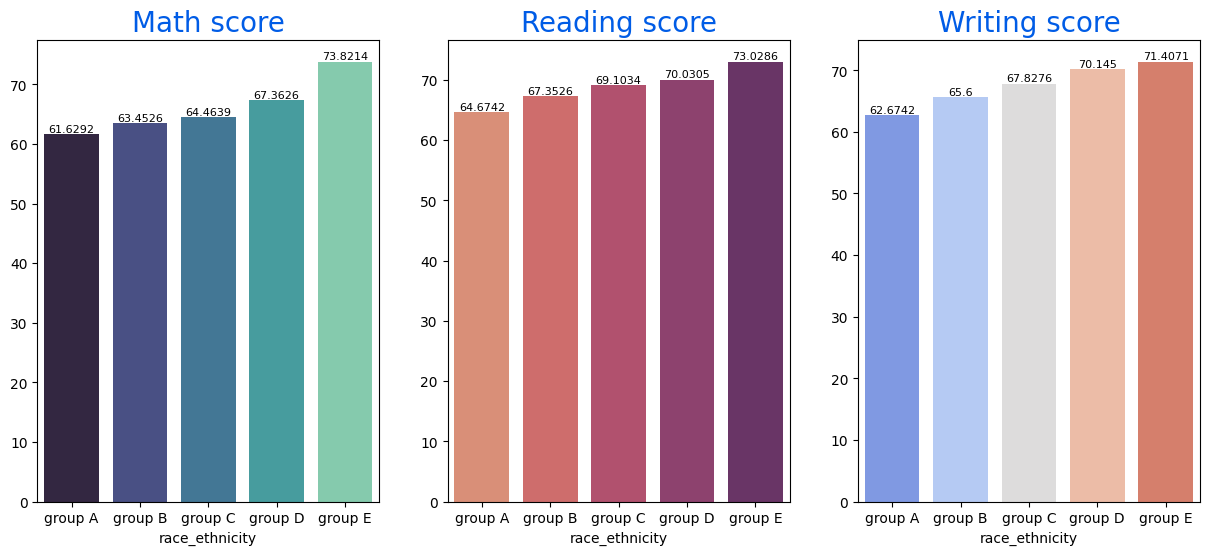

In [34]:
group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(15,6))
sns.barplot(x=group_data2.math_score.mean().index,y=group_data2.math_score.mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=8)

sns.barplot(x=group_data2.reading_score.mean().index,y=group_data2.reading_score.mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=8)


sns.barplot(x=group_data2.writing_score.mean().index,y=group_data2.writing_score.mean().values,palette='coolwarm'  ,ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=8)    

**Insights**

* Group E has scored highest marks.
* Group A has scored lowest marks.

**4.4.3 Parental level of education column**

* What is the educational background of parents??
* Has parental level of education any impact on students performance??